In [1]:
### 표준 라이브러리 로딩

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# 경고 무시
import warnings
warnings.filterwarnings('ignore')

### MovieLens 데이터셋 정보
https://grouplens.org/datasets.movielens
#### rating
- user_id
- movie_id
- rating
- time
#### movie
- movie_id
- title
- genre
#### user
- user_id
- gender
- age
- occuption(개인정보-직업)
- zipcode(개인정보-주소)
#### ETC
- 각 데이터는 '::' 구분자를 사용하여 열을 구분하였다.

#### 데이터 로딩

In [3]:
rating_data = pd.io.parsers.read_csv('D:/python3/data/ratings.dat', #sep='::',
                                    names=['user_id', 'movie_id', 'rating', 'time'],
                                    delimiter='::')  # delimiter 종결자

movie_data = pd.io.parsers.read_csv('D:/python3/data/movies.dat',
                                    names=['movie_id', 'title', 'genre'],
                                    delimiter='::')

user_data = pd.io.parsers.read_csv('D:/python3/data/users.dat',
                                    names=['user_id', 'gender', 'age', 'occupation', 'zipcode'],
                                    delimiter='::')

In [4]:
rating_data.head()

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
user_data.head()

,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [6]:
movie_data.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
user_id     1000209 non-null int64
movie_id    1000209 non-null int64
rating      1000209 non-null int64
time        1000209 non-null int64
dtypes: int64(4)
memory usage: 30.5 MB


In [8]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
user_id       6040 non-null int64
gender        6040 non-null object
age           6040 non-null int64
occupation    6040 non-null int64
zipcode       6040 non-null object
dtypes: int64(3), object(2)
memory usage: 236.0+ KB


In [9]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
movie_id    3883 non-null int64
title       3883 non-null object
genre       3883 non-null object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [10]:
rating_data.isnull().sum()  # 결측값 개수 확인

user_id     0
movie_id    0
rating      0
time        0
dtype: int64

In [11]:
user_data.isnull().sum()

user_id       0
gender        0
age           0
occupation    0
zipcode       0
dtype: int64

In [12]:
movie_data.isnull().sum()

movie_id    0
title       0
genre       0
dtype: int64

### 탐색적 데이터 분석

In [13]:
# 총 영화의 개수
len(movie_data['movie_id'].unique())

3883

In [14]:
# 연도별 영화의 개수를 이용해서 가장 많은 영화가 출시된 연도 Top 10
# movie_data['title'].head()
# len(movie_data['title'][-5:-1])
movie_data['year'] = movie_data['title'].apply(lambda x: x[-5:-1])

# 개별요소의 건수 value_counts()
movie_data['year'].value_counts().head(10)

1996    345
1995    342
1998    337
1997    315
1999    283
1994    257
1993    165
2000    156
1986    104
1992    102
Name: year, dtype: int64

In [15]:
# 연대별 영화의 개수 추출
# 1900, 1910, 1920 .....
# 파생변수 : year_term
movie_data['year_term'] = movie_data['title'].apply(lambda x: x[-5:-2]+'0')
movie_year_term = movie_data['year_term'].value_counts().sort_index()
movie_year_term

1910       3
1920      34
1930      77
1940     126
1950     168
1960     191
1970     247
1980     598
1990    2283
2000     156
Name: year_term, dtype: int64

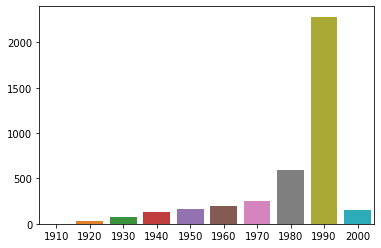

In [16]:
sns.barplot(movie_year_term.index, movie_year_term.values)
plt.show()

In [17]:
movie_data.iterrows

<bound method DataFrame.iterrows of       movie_id                                              title  \
0            1                                   Toy Story (1995)   
1            2                                     Jumanji (1995)   
2            3                            Grumpier Old Men (1995)   
3            4                           Waiting to Exhale (1995)   
4            5                 Father of the Bride Part II (1995)   
5            6                                        Heat (1995)   
6            7                                     Sabrina (1995)   
7            8                                Tom and Huck (1995)   
8            9                                Sudden Death (1995)   
9           10                                   GoldenEye (1995)   
10          11                     American President, The (1995)   
11          12                 Dracula: Dead and Loving It (1995)   
12          13                                       Balto (1995)  

In [18]:
# 영화데이터에서 가장 많이 등장하는 장르는 무엇일까?
# 코미디 | 드라마 | 액션 => 구분자
# dict => key:value
unique_genre_dict = {}

for index, row in movie_data.iterrows() :      # iterrows : 행 하나하나 접근
    # genre 피처의 구분자를 분리
    genre_combination = row['genre']
    p = genre_combination.split("|")
    
    for genre in p:
        if genre in unique_genre_dict:
            unique_genre_dict[genre] += 1
        else:
            unique_genre_dict[genre] = 1

unique_genre_dict

{'Animation': 105,
 "Children's": 251,
 'Comedy': 1200,
 'Adventure': 283,
 'Fantasy': 68,
 'Romance': 471,
 'Drama': 1603,
 'Action': 503,
 'Crime': 211,
 'Thriller': 492,
 'Horror': 343,
 'Sci-Fi': 276,
 'Documentary': 127,
 'War': 143,
 'Musical': 114,
 'Mystery': 106,
 'Film-Noir': 44,
 'Western': 68}

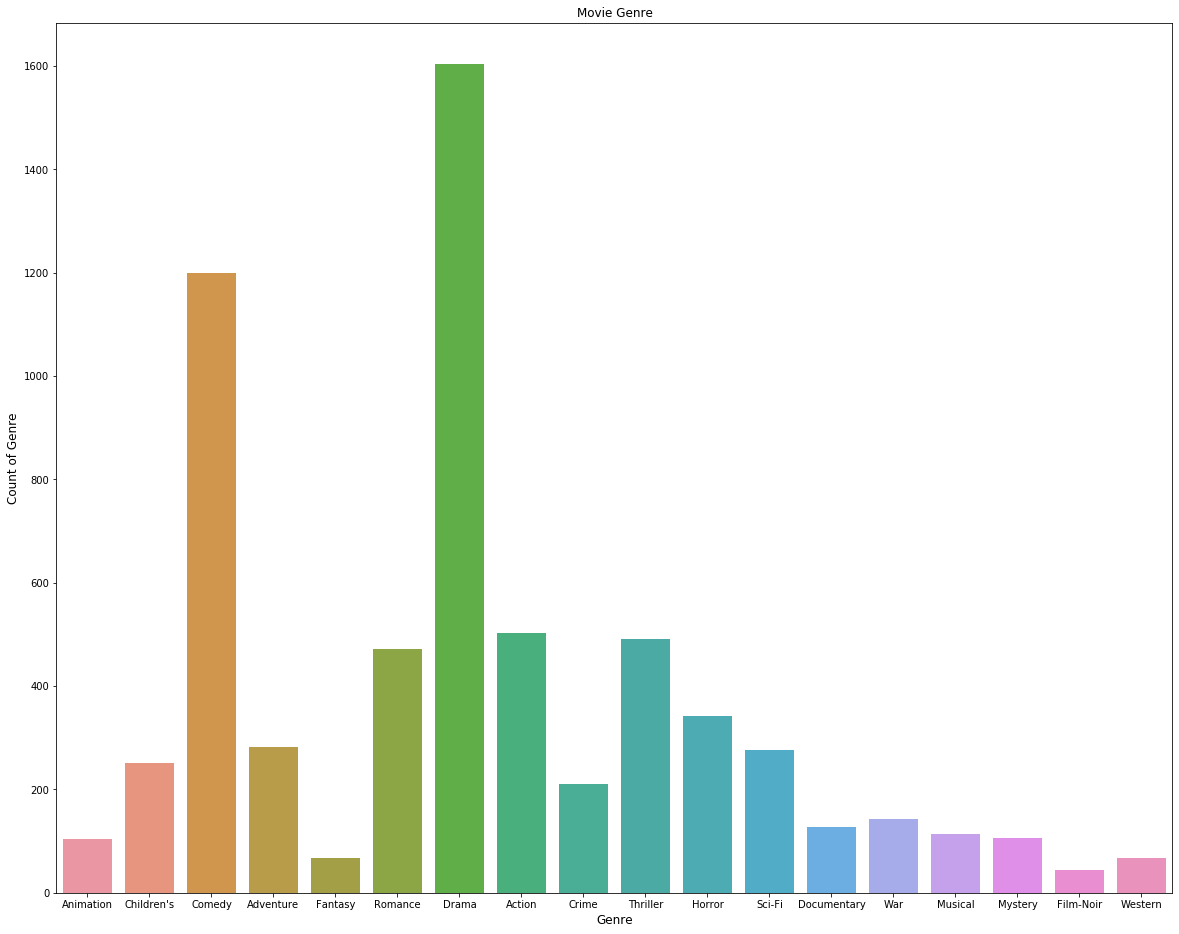

In [19]:
plt.rcParams['figure.figsize'] = [20, 16]
sns.barplot(list(unique_genre_dict.keys()),
            list(unique_genre_dict.values()))
plt.title('Movie Genre')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Count of Genre', fontsize=12)
plt.show()

In [20]:
# 사용자의 성별과 사용자의 연령대
user_gender = user_data['gender'].value_counts()
user_gender

M    4331
F    1709
Name: gender, dtype: int64

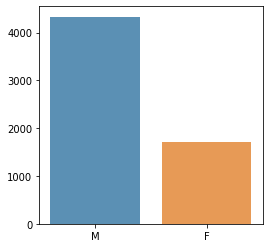

In [21]:
plt.rcParams['figure.figsize'] = [4, 4]
sns.barplot(user_gender.index, user_gender.values, alpha=.8)
plt.show()

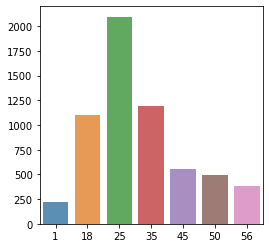

In [22]:
plt.rcParams['figure.figsize'] = [4, 4]
user_ages = user_data['age'].value_counts()
sns.barplot(user_ages.index, user_ages.values, alpha=.8)
plt.show()

In [23]:
# user의 나이를 연령대로 묶는 작업
def age_classification(age):
    if age == 1:
        return 'outlier'
    else:
        return str(age)[0]+'0'
    
user_data['ages'] = user_data['age'].apply(lambda x: age_classification(x))

user_ages = user_data['ages'].value_counts()#.sort_index()
user_ages

20         2096
30         1193
10         1103
50          876
40          550
outlier     222
Name: ages, dtype: int64

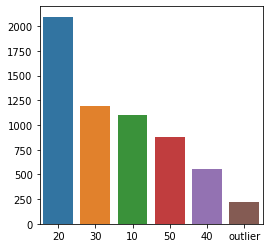

In [24]:
plt.rcParams['figure.figsize'] = [4, 4]
sns.barplot(user_ages.index, user_ages.values)
plt.show()

In [25]:
# 각 영화의 평점횟수
movie_rate_count = rating_data.groupby('movie_id')['rating'].count()
movie_rate_count.tail()

movie_id
3948    862
3949    304
3950     54
3951     40
3952    388
Name: rating, dtype: int64

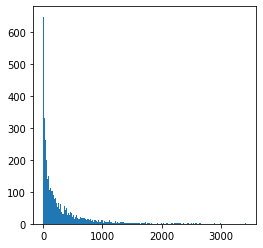

In [26]:
fig = plt.hist(movie_rate_count.values, bins=200)
plt.show()

In [27]:
print('총 영화 수 : ',len(movie_data['movie_id'].unique()))

총 영화 수 :  3883


In [28]:
print('100개 미만의 평가를 받은 영화 수 :', len(movie_rate_count[movie_rate_count<100]))

100개 미만의 평가를 받은 영화 수 : 1687


In [29]:
# 각 영화의 평균평점을 추출
# 각 영화당 평점건수와 평균값을 추출하시오
movie_groupby_rating_info = rating_data.groupby('movie_id')['rating'].agg(
    {'rated_count':'count', 'rated_mean':'mean'})
movie_groupby_rating_info.tail()

,rated_count,rated_mean
movie_id,,
3948,862,3.635731
3949,304,4.115132
3950,54,3.666667
3951,40,3.900000
3952,388,3.780928


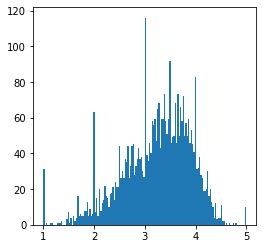

In [30]:
movie_groupby_rating_info['rated_mean'].hist(bins=150, grid=False)

In [31]:
# 유저별로 평가한 영화 개수

In [32]:
user_grouped_rating_info = rating_data.groupby(
    'user_id')['rating'].agg(['count', 'mean', 'std'])
user_grouped_rating_info.columns = ['rating_count', 'rating_mean', 'rating_std']
user_grouped_rating_info.head()

,rating_count,rating_mean,rating_std
user_id,,,
1,53,4.188679,0.680967
2,129,3.713178,1.001513
3,51,3.901961,0.984985
4,21,4.190476,1.077917
5,198,3.146465,1.132699


In [33]:
# 유저별로 평가한 평균 영화의 평점

In [34]:
# 유저별로 평가한 영화 점수의 편차(std)

In [35]:
# 100번 이상 평가 받은 영화 중 평균평점이 높은 Top 10의 영화 출력
merged_data = movie_groupby_rating_info.merge(movie_data, on=['movie_id'], how='left')
merged_data.head()

,movie_id,rated_count,rated_mean,title,genre,year,year_term
0,1,2077,4.146846,Toy Story (1995),Animation|Children's|Comedy,1995,1990
1,2,701,3.201141,Jumanji (1995),Adventure|Children's|Fantasy,1995,1990
2,3,478,3.016736,Grumpier Old Men (1995),Comedy|Romance,1995,1990
3,4,170,2.729412,Waiting to Exhale (1995),Comedy|Drama,1995,1990
4,5,296,3.006757,Father of the Bride Part II (1995),Comedy,1995,1990


In [36]:
# nlargest(n, 값이 있는 피처) : 가장 큰 값을 n번째까지 구해주는 함수
merged_data[merged_data['rated_count']>100][
    ['rated_mean', 'title']].nlargest(10, 'rated_mean') # nlargest : 큰 순서대로 n개

,rated_mean,title
1839,4.560510,Seven Samurai (The Magnificent Seven) (Shichin...
309,4.554558,"Shawshank Redemption, The (1994)"
802,4.524966,"Godfather, The (1972)"
708,4.520548,"Close Shave, A (1995)"
49,4.517106,"Usual Suspects, The (1995)"
513,4.510417,Schindler's List (1993)
1066,4.507937,"Wrong Trousers, The (1993)"
861,4.491489,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)
1108,4.477725,Raiders of the Lost Ark (1981)
843,4.476190,Rear Window (1954)


### 영화 평점 예측 - 추천시스템 알고리즘
- 이미지, 영상 인식
- 소리 인식
- 사기방지
- 이상감지
- 침입탐지
- 환자진단
- 재고 최적화
- 수요 예측
- 추천시스템 : CF(Collaborative Filtering 상품기반(협업필터링) - 소모성물건 추천),
               CB(Content-Based Filtering 내용기반),
               KB(Knowledge-Based Filtering 지식기반)

In [37]:
rating_data.head()

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [38]:
rating_table = rating_data[
    ['user_id', 'movie_id', 'rating']].set_index(['user_id', 'movie_id']).unstack()
rating_table.tail(10)

rating                                               ...            \
movie_id   1    2    3    4    5    6    7    8    9    10    ... 3943 3944   
user_id                                                       ...             
6031        NaN  NaN  NaN  NaN  NaN  NaN  NaN  5.0  NaN  NaN  ...  NaN  NaN   
6032        4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
6033        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
6034        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
6035        4.0  NaN  1.0  2.0  1.0  NaN  3.0  NaN  NaN  NaN  ...  NaN  NaN   
6036        NaN  NaN  NaN  2.0  NaN  3.0  NaN  NaN  NaN  NaN  ...  NaN  NaN   
6037        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
6038        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
6039        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
6040        3.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   

                                                  
movie_id 3945 3946 3947 3948 3949 3950 3951 3952  
user_id                                           
6031      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6032      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6033      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6034      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6035      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6036      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6037      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6038      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6039      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6040      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[10 rows x 3706 columns]

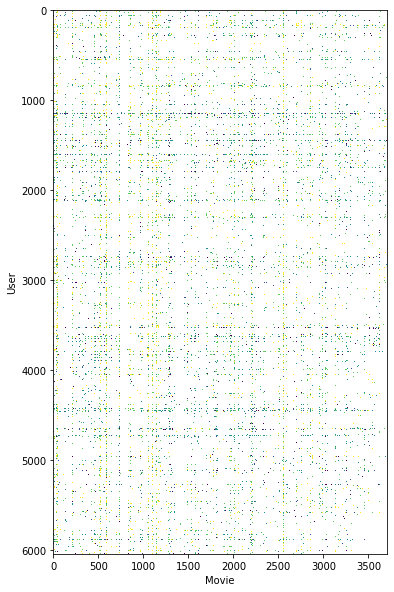

In [39]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.imshow(rating_table)  # imshow 이미지 그대로,,

plt.grid(False)
plt.xlabel('Movie')
plt.ylabel('User')
plt.show()             # 비워져있는거 채우기 -> SVD

### SVD를 활용한 추천시스템

In [40]:
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split  # 행렬의 곱을 이용하여 값을 채움

# 학습데이터
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(rating_data[['user_id', 'movie_id', 'rating']], reader)
train_data = data.build_full_trainset()

In [41]:
# SVD 모델 학습
import time

train_start = time.time()

model = SVD(n_factors = 8,   # 요소의 수
           lr_all = 0.005,
           reg_all = 0.02,
           n_epochs = 100)

model.fit(train_data)

train_end = time.time()
print(train_end-train_start)  # 학습시간

77.62046003341675


In [46]:
# 영화의 평점을 예측할 타겟이 되는 유저
target_user_id = 4             # 4번유저
target_user_data = rating_data[rating_data['user_id']==target_user_id]
target_user_data.head()

,user_id,movie_id,rating,time
233,4,3468,5,978294008
234,4,1210,3,978293924
235,4,2951,4,978294282
236,4,1214,4,978294260
237,4,1036,4,978294282


In [47]:
target_user_movie_rating_dict = {}

for index, row in target_user_data.iterrows():    # iterrow() 행단위로 읽어오기
    movie_id = row['movie_id']
    target_user_movie_rating_dict[movie_id] = row['rating']
target_user_movie_rating_dict

{3468: 5,
 1210: 3,
 2951: 4,
 1214: 4,
 1036: 4,
 260: 5,
 2028: 5,
 480: 4,
 1196: 2,
 1198: 5,
 1954: 5,
 1097: 4,
 3418: 4,
 3702: 4,
 2366: 4,
 1387: 5,
 3527: 1,
 1201: 5,
 2692: 5,
 2947: 5,
 1240: 5}

In [48]:
# 4번 유저가 보지 않은 영화들 중 평점이 높은 영화 10개 추출
